# Домашнее задание №4: Логистическая регрессия

## Задание №1

Для выполнения используется набор данных `Weekly` из пакета `ISLR`.

1. Рассчитайте описательные статистики и постройте графики для переменных из таблицы `Weekly`. Видны ли какие-либо закономерности?

In [ ]:
install.packages('ISLR')
library(ISLR)
library(MASS)

head(Weekly)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
6,1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [ ]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

Из описательные статистики можно сделать вывод, что прирост за 1-5 недели (`Lag`), вероятно, имеет аналогичное распределение. То же самое можно наблюдать для `Today`.

Большая часть прироста положительна (среднее значение и медиана по всем столбцам больше 0), это можно объяснить тем, что за 20 лет, о которых здесь идет речь, рынок в основном рос. Об этом также говорит столбец `Direction`, в котором количество вхождений `Up` больше, чем `Down` (55% - это Up).


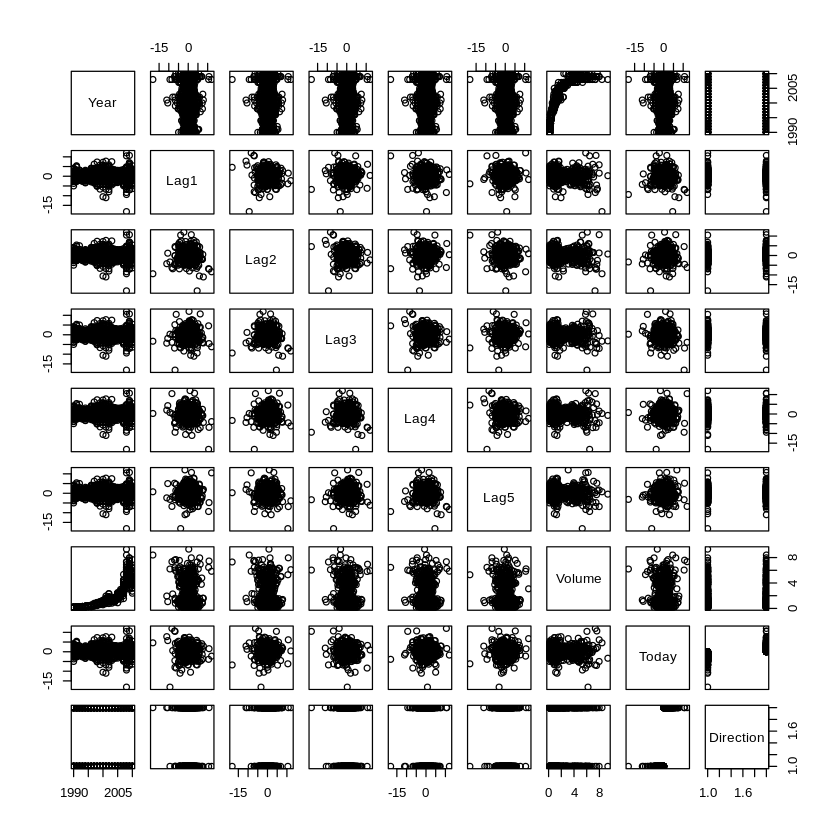

In [ ]:
pairs(Weekly)

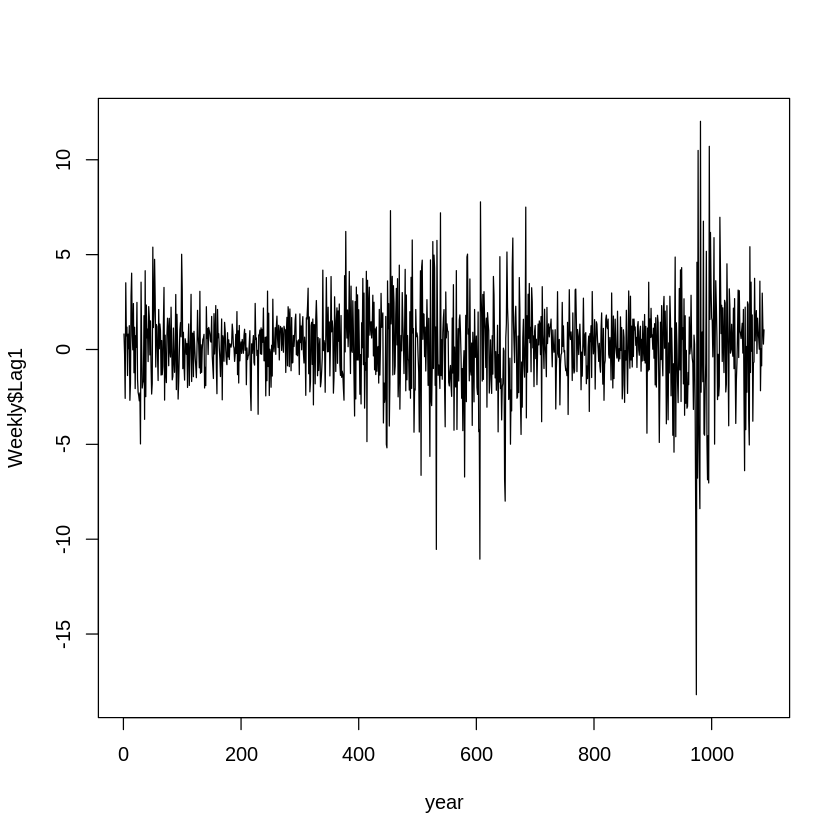

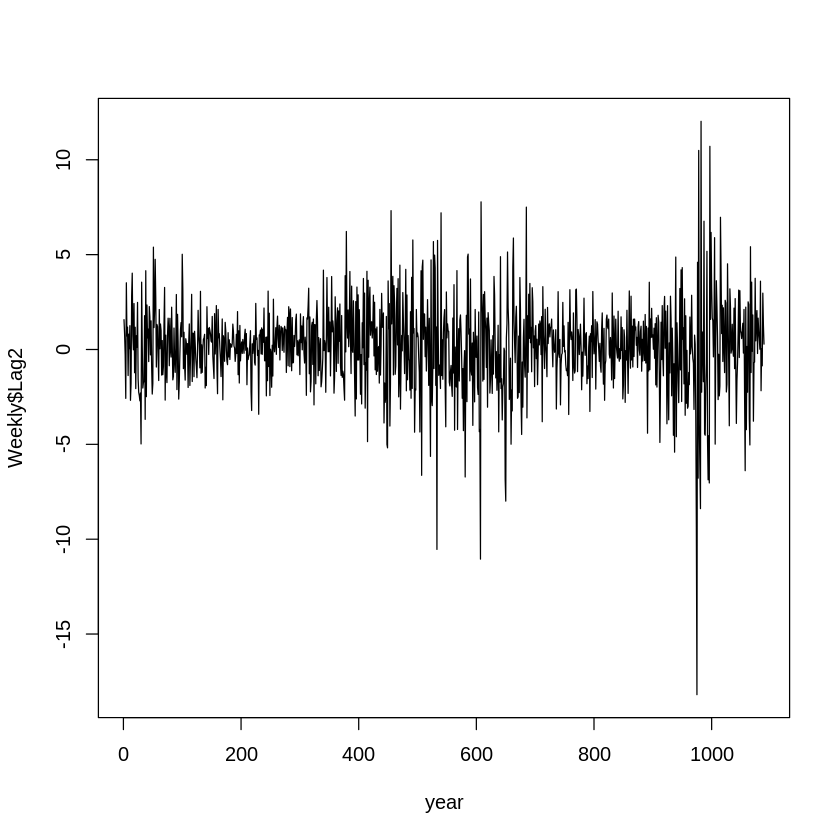

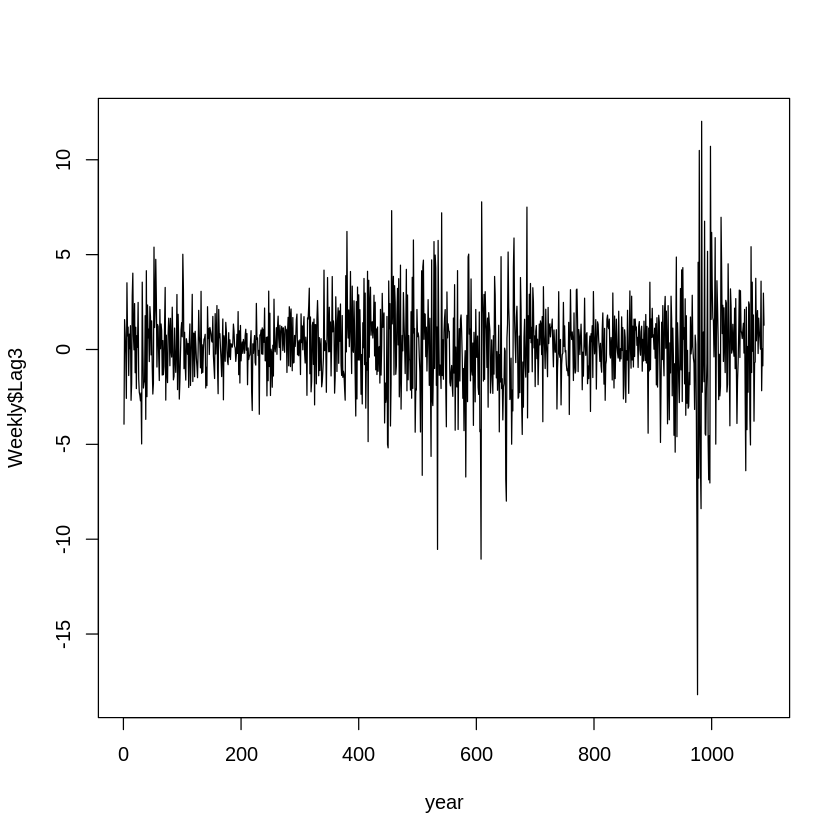

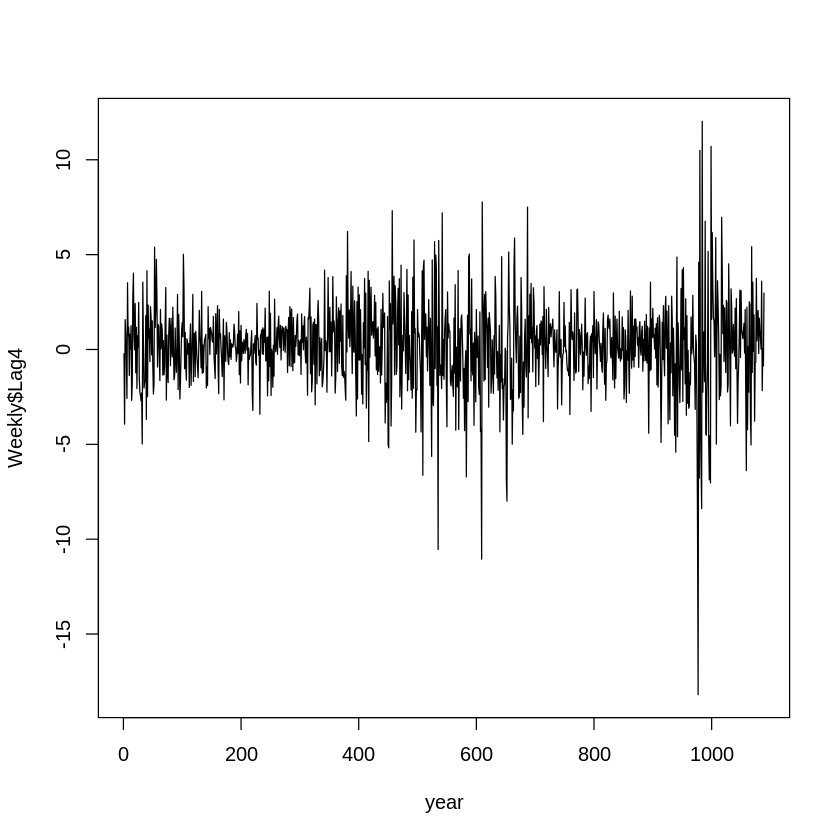

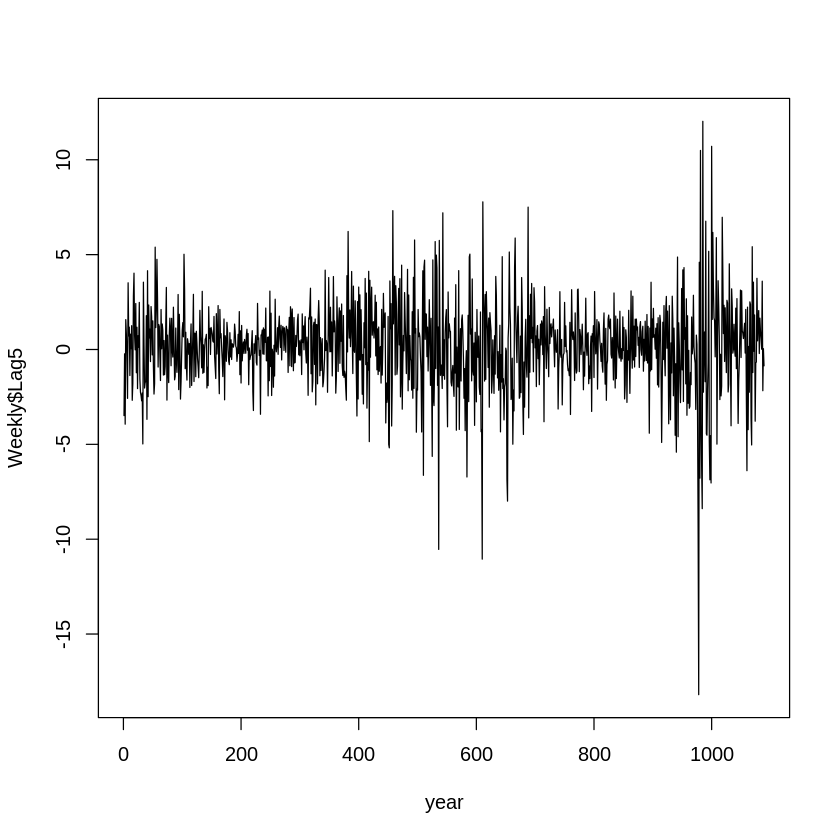

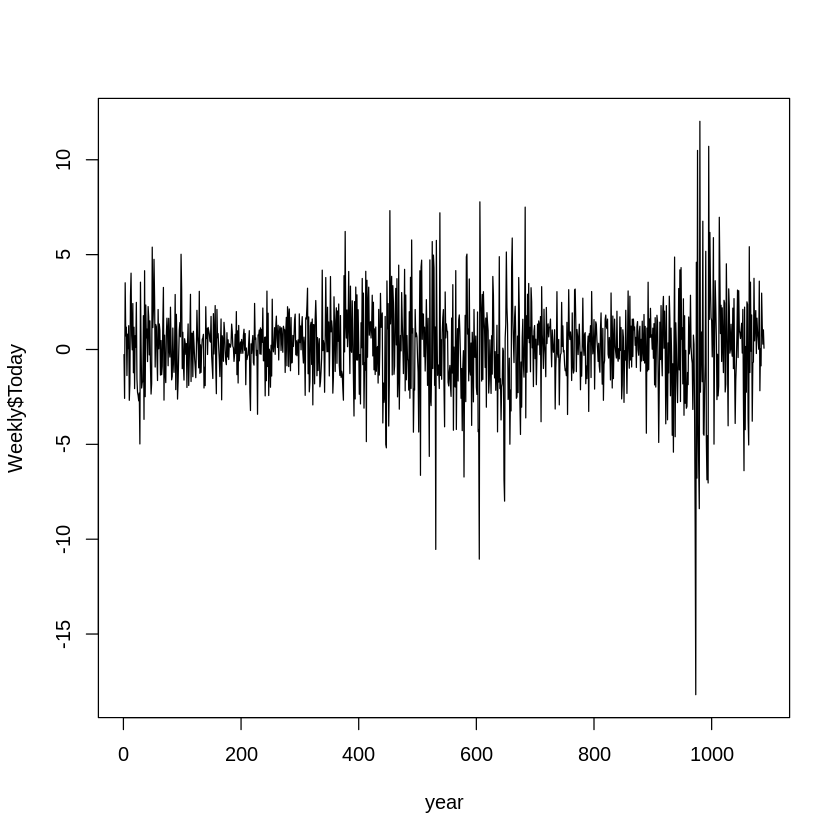

In [ ]:
plot(Weekly$Lag1, type="l", xlab="year")
plot(Weekly$Lag2, type="l", xlab="year")
plot(Weekly$Lag3, type="l", xlab="year")
plot(Weekly$Lag4, type="l", xlab="year")
plot(Weekly$Lag5, type="l", xlab="year")
plot(Weekly$Today, type="l", xlab="year")

На графическом представлении заметно, что на 950 выборке дисперсия приращения увеличивается. Это период около 2008 года, когда произошел один из крупнейших экономических кризисов.

2. Используйте весь набор данных для подгонки логистической регрессии с Direction в качестве отклика и пятью лаг-переменными и `Volume` в качестве предикторов. Примените функцию `summary()` для вывода результатов. Можно ли сделать заключение, что некоторые из предикторов являются статистически значимыми? Если да, то какие?

In [ ]:
logistic_model <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume,
                     data = Weekly,
                     family = binomial)
summary(logistic_model)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Да, статистически значимой переменной является `Lag2`, т.к. pvalue < 0.05.
Наиболее статистически значимим является `Intersept`.

3. Рассчитайте матрицу неточностей и общую долю правильно классифицированных случаев. Объясните, что говорит матрица неточностей о разных типах ошибок, сделанных логистической регрессией.

In [ ]:
probas <- predict(logistic_model, type = "response")
preds <- rep("Down", length(probas))
preds[probas > 0.5] <- "Up"
trues <- Weekly$Direction
conf_matrix <- table(trues, preds)
print(conf_matrix)
print(paste("Accuracy:", mean(preds == trues)))

      preds
trues  Down  Up
  Down   54 430
  Up     48 557
[1] "Accuracy: 0.561065197428834"


По матрице неточностей можно сказать, что ошибка 2-го рода сильно превышает ошибку 1-го рода. Модель чаще склоняется к предсказаниям `Up`.

Общая доля правильно классифицированных случаев 56%.

4. Теперь постройте логистическую регрессию на основе обучающих данных, охватывающих период с 1990 по 2008 гг., с `Lag2` в качестве единственного предиктора. Рассчитайте матрицу  неточностей и общую долю правильно классифицированных случаев для контрольной выборки (т.е. данных за 2009-2010 г.).

In [ ]:
train_weekly <- Weekly[Weekly$Year <= 2008, ]
test_weekly <- Weekly[Weekly$Year > 2008, ]
logistic_model = glm(Direction ~ Lag2, data=train_weekly, family=binomial)
probas <- predict(logistic_model, test_weekly, type = "response")
preds <- rep("Down", length(probas))
preds[probas > 0.5] <- "Up"
trues <- test_weekly$Direction
conf_matrix <- table(trues, preds)
print(conf_matrix)
print(paste("Accuracy:", mean(preds == trues)))

      preds
trues  Down Up
  Down    9 34
  Up      5 56
[1] "Accuracy: 0.625"


5. Повторите п. 4 с использованием LDA.

In [ ]:
lda_model <- lda(Direction ~ Lag2, data=train_weekly)
preds <- predict(lda_model, test_weekly)$class
trues <- test_weekly$Direction
conf_matrix <- table(trues, preds)
print(conf_matrix)
print(paste("Accuracy:", mean(preds == trues)))

      preds
trues  Down Up
  Down    9 34
  Up      5 56
[1] "Accuracy: 0.625"


6. Повторите п. 4 с использованием QDA.

In [ ]:
qda_model <- qda(Direction~Lag2, data=train_weekly)
preds <- predict(qda_model, test_weekly)$class
trues <- test_weekly$Direction
conf_matrix <- table(trues, preds)
print(conf_matrix)
print(paste("Accuracy:", mean(preds == trues)))

      preds
trues  Down Up
  Down    0 43
  Up      0 61
[1] "Accuracy: 0.586538461538462"


7. Какой из методов обеспечивает наиболее точные предсказания для этих данных?

Методы `glm` и `lda` показали одинаковые результаты, точность моделей 62.5%.

8. Поэкспериментируйте с разными комбинациями предикторов (включая возможные трансформации и взаимодействия) для каждого метода. Составьте небольшой обзор с указанием предикторов, метода и матрицы неточностей, которые соответствуют наилучшим результатам на контрольной выборке.

In [ ]:
predictors <- c("Lag1", "Lag2", "Lag3", "Lag4", "Lag5", "Volume",
               # "sqrt(Lag1)", "sqrt(Lag2)", "sqrt(Lag3)", "sqrt(Lag4)",  "sqrt(Lag5)", "sqrt(Volume)",
               # "log(Lag1)", "log(Lag2)", "log(Lag3)", "log(Lag4)", "log(Lag5)", "log(Volume)",
               "sqrt(Volume)", "log(Volume)",
                "I(Lag1^2)", "I(Lag2^2)", "I(Lag3^2)", "I(Lag4^2)", "I(Lag5^2)", "I(Volume^2)")

get_glm_preds <- function(formula, train_data, test_data) {
  model <- glm(as.formula(formula), data=train_data, family=binomial)
  probas <- predict(model, test_data, type="response")
  preds <- rep("Down", length(probas))
  preds[probas > 0.5] <- "Up"
  return(preds)
}

get_da_preds <- function(formula, train_data, test_data, da) {
  model <- da(as.formula(formula), data=train_data)
  preds <- predict(model, test_data)$class
  return(preds)
}

best_model_acc <- 0
best_model_preds <- 0
best_model_formula <- ""
best_model_type <- ""
trues <- test_weekly$Direction

for (num_predictors in 1:length(predictors)) {
  predictor_combinations <- combn(predictors, num_predictors)
  num_combinations <- dim(predictor_combinations)[2]
  for (combination_idx in 1:num_combinations) {
    formula <- paste(
      "Direction ~ ",
      paste(predictor_combinations[, combination_idx], collapse="+"),
      sep=""
    )

    glm_preds <- get_glm_preds(formula, train_weekly, test_weekly)
    logistic_acc <- mean(glm_preds == trues)
    if (logistic_acc > best_model_acc){
      best_model_acc <- logistic_acc
      best_model_preds <- table(trues, glm_preds)
      best_model_formula <- formula
      best_model_type <- "GLM"
    }

    lda_preds <- get_da_preds(formula, train_weekly, test_weekly, lda)
    lda_acc <- mean(lda_preds == trues)
    if (lda_acc > best_model_acc){
      best_model_acc <- lda_acc
      best_model_preds <- table(trues, lda_preds)
      best_model_formula <- formula
      best_model_type <- "LDA"
    }

    qda_preds <- get_da_preds(formula, train_weekly, test_weekly, qda)
    qda_acc <- mean(qda_preds == trues)
    if (qda_acc > best_model_acc){
      best_model_acc <- qda_acc
      best_model_preds <- table(trues, qda_preds)
      best_model_formula <- formula
      best_model_type <- "QDA"
    }
  }
}

print(paste("Best model: ", best_model_type))
print(paste("Formula: ", best_model_formula))
print(paste("Acc: ", best_model_acc))
print(best_model_preds)

[1] "Best model:  GLM"
[1] "Formula:  Direction ~ Lag2+I(Lag1^2)"
[1] "Acc:  0.644230769230769"
      glm_preds
trues  Down Up
  Down    8 35
  Up      2 59


Возможные трансформации для `Lag` ограничены, т.к. они могут принимать отрицательные значения.

Получить результат намного лучше, чем в п.4/5 не получилось, точность немного выше для логистической регрессии с формулой `Direction ~ Lag2+I(Lag1^2)` и составляет 64.4%.

## Задание №2

Для выполнения используется набор данных `Auto`.

1. Создайте бинарную переменную `mpgOl`, которая равна 1, если переменная `mpg` превышает собственную медиану, и 0, если `mpg` меньше собственной медианы. Вы можете вычислить медиану при помощи функции `median()`. Обратите внимание: полезной может оказаться функция `data.frame()`, которая поможет создать одну таблицу данных, включающую как `mpgOl`, так и другие переменные из таблицы.

In [ ]:
data("Auto")
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [ ]:
Auto$mpgOl = as.factor(mapply(function(x) as.integer(x > median(Auto$mpg)), Auto$mpg))
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpgOl
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


2. Исследуйте эти данные графически для установления связи между `mpgOl` и другими переменными. Какие из этих переменных выглядят наиболее подходящими для предсказания `mpgOl`? Для ответа на этот вопрос полезными могут оказаться диаграммы рассеяния и диаграммы размахов. Опишите свои находки.

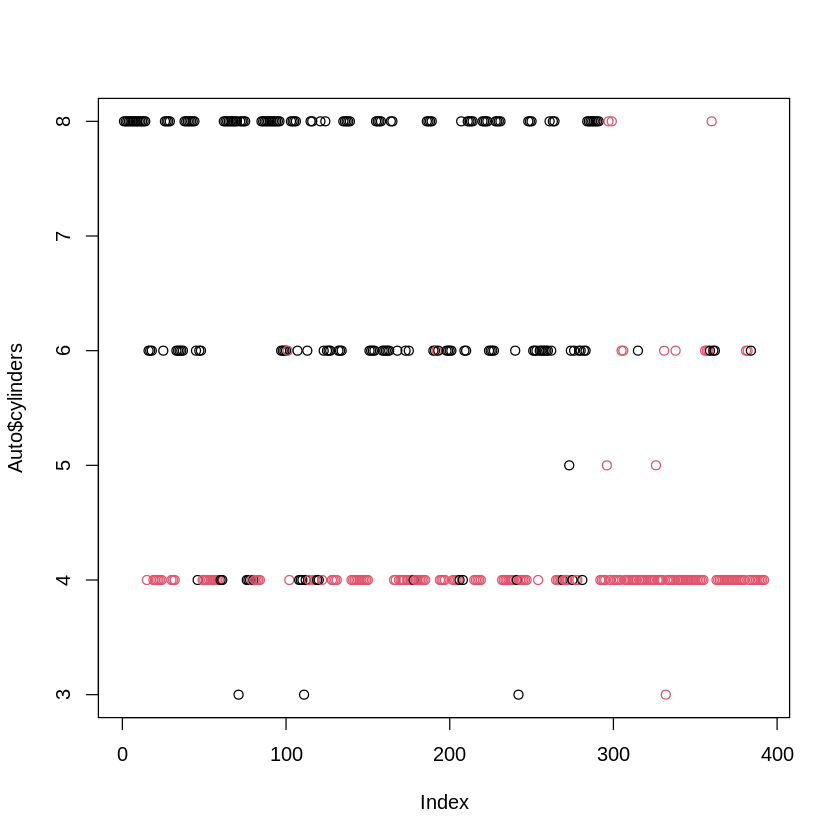

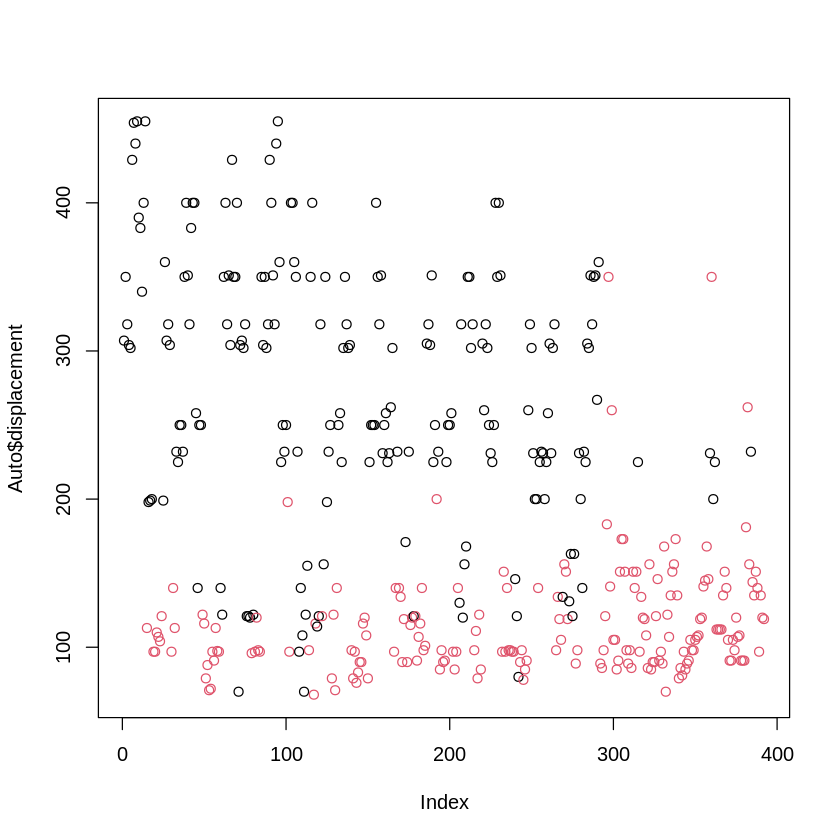

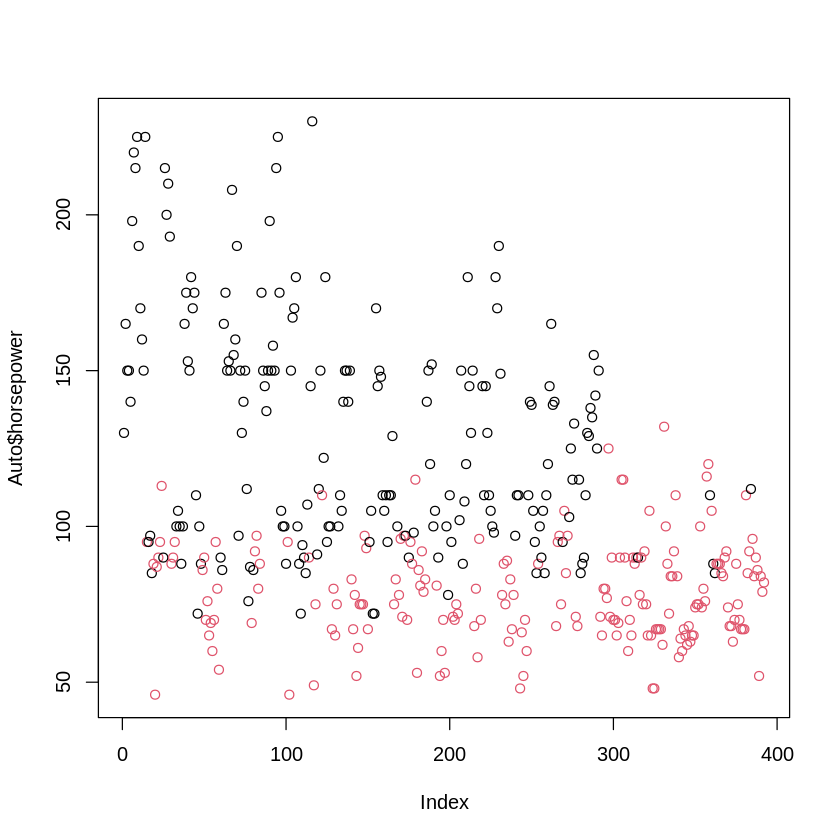

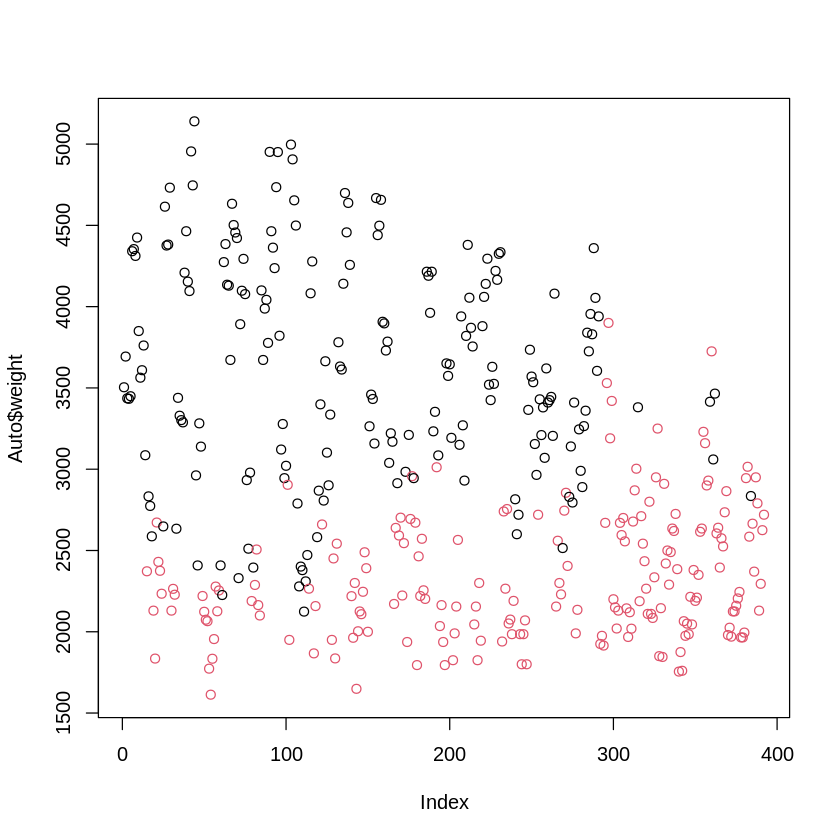

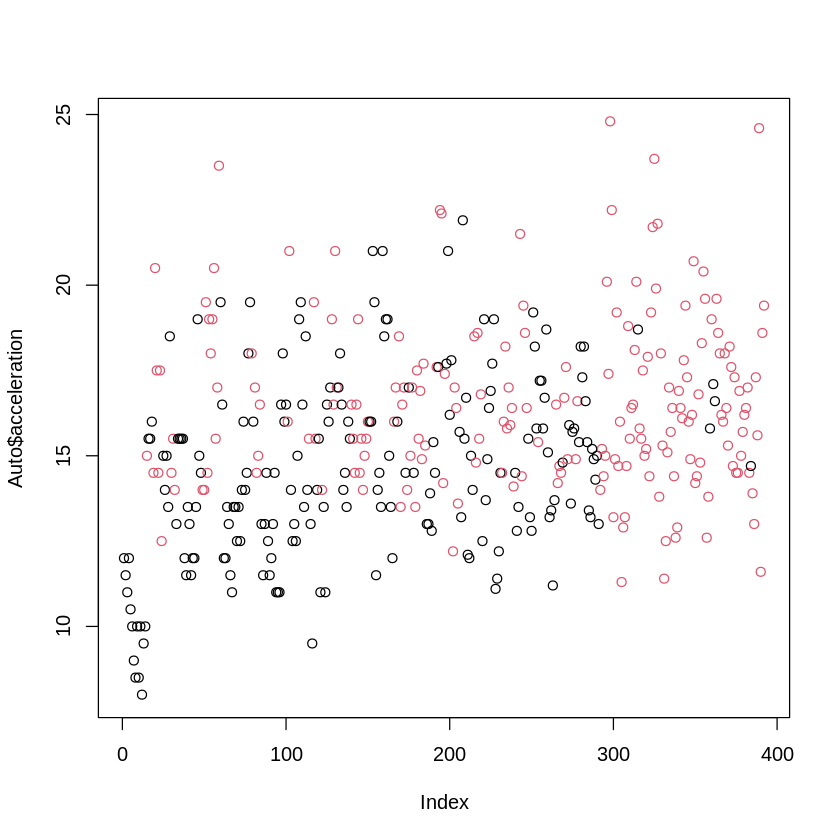

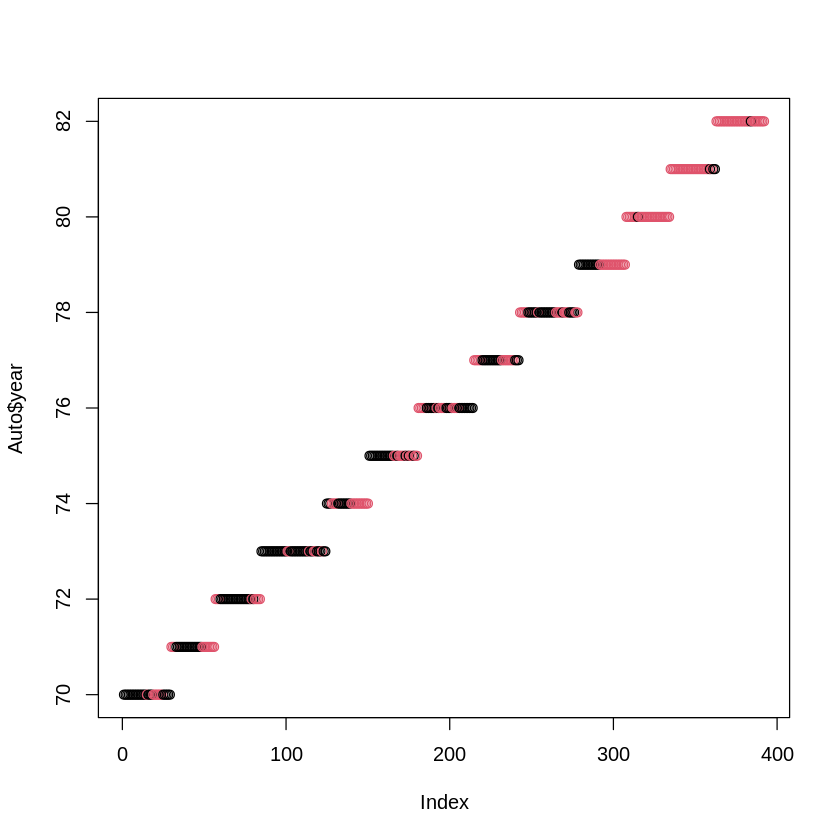

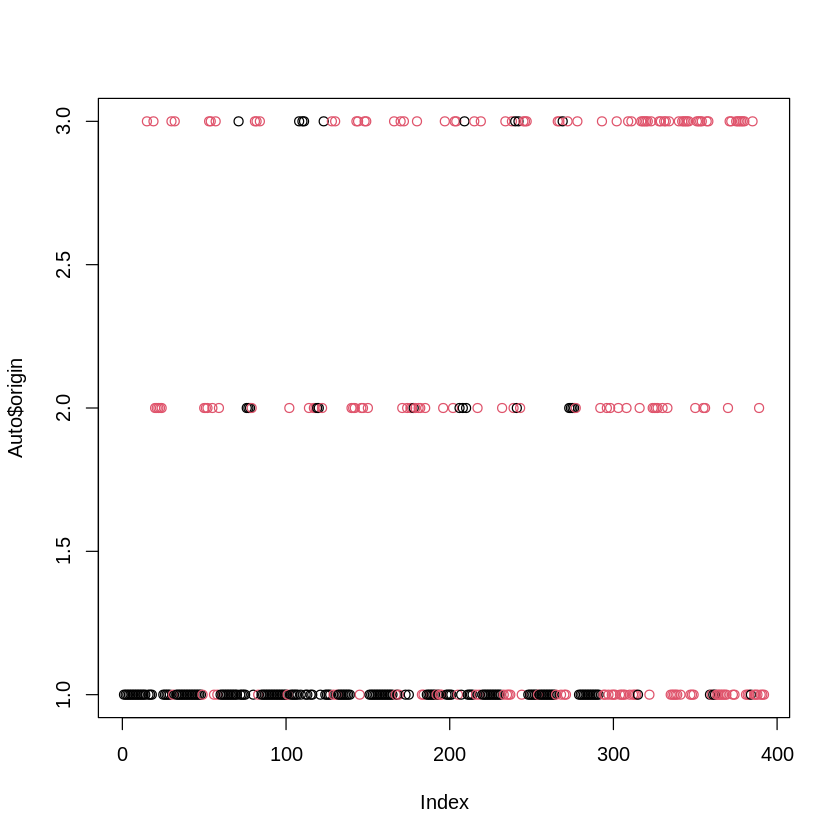

In [ ]:
plot(Auto$cylinders, col=Auto$mpgOl)
plot(Auto$displacement, col=Auto$mpgOl)
plot(Auto$horsepower, col=Auto$mpgOl)
plot(Auto$weight, col=Auto$mpgOl)
plot(Auto$acceleration, col=Auto$mpgOl)
plot(Auto$year, col=Auto$mpgOl)
plot(Auto$origin, col=Auto$mpgOl)

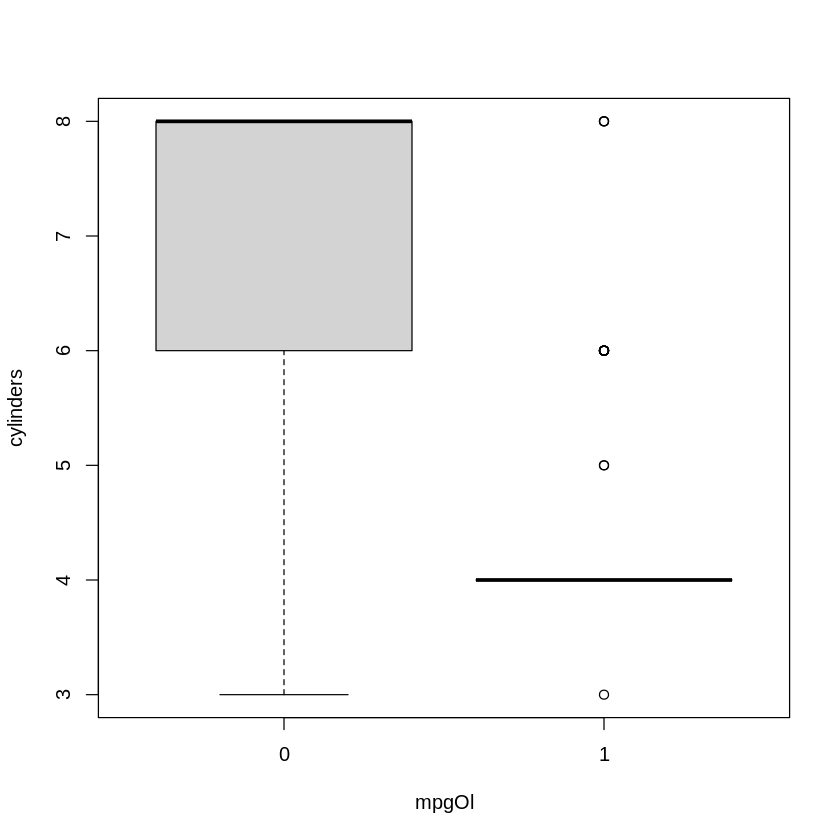

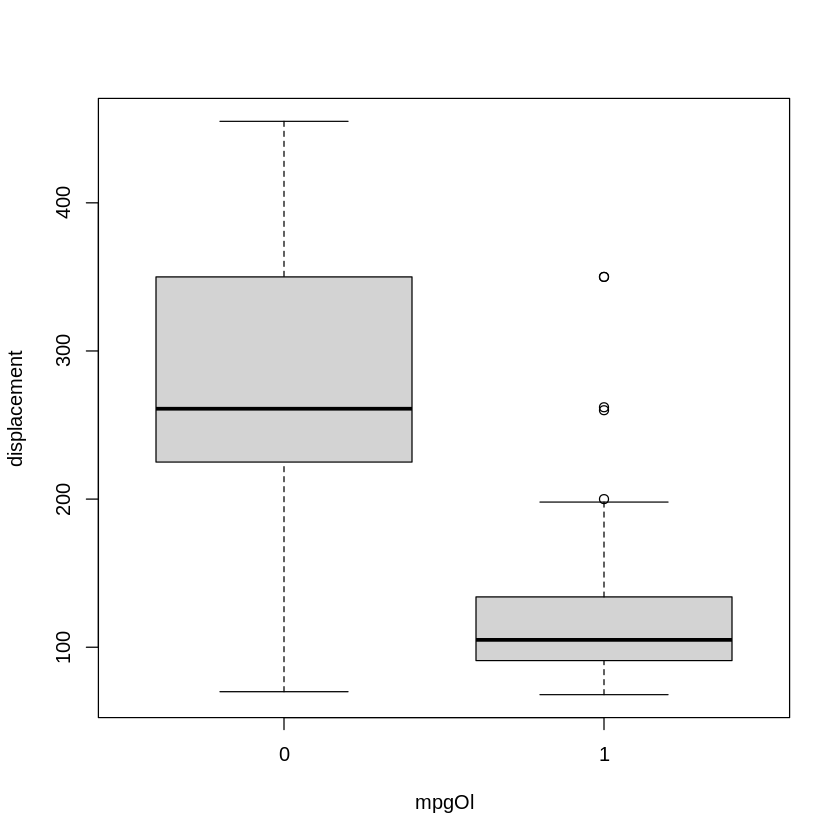

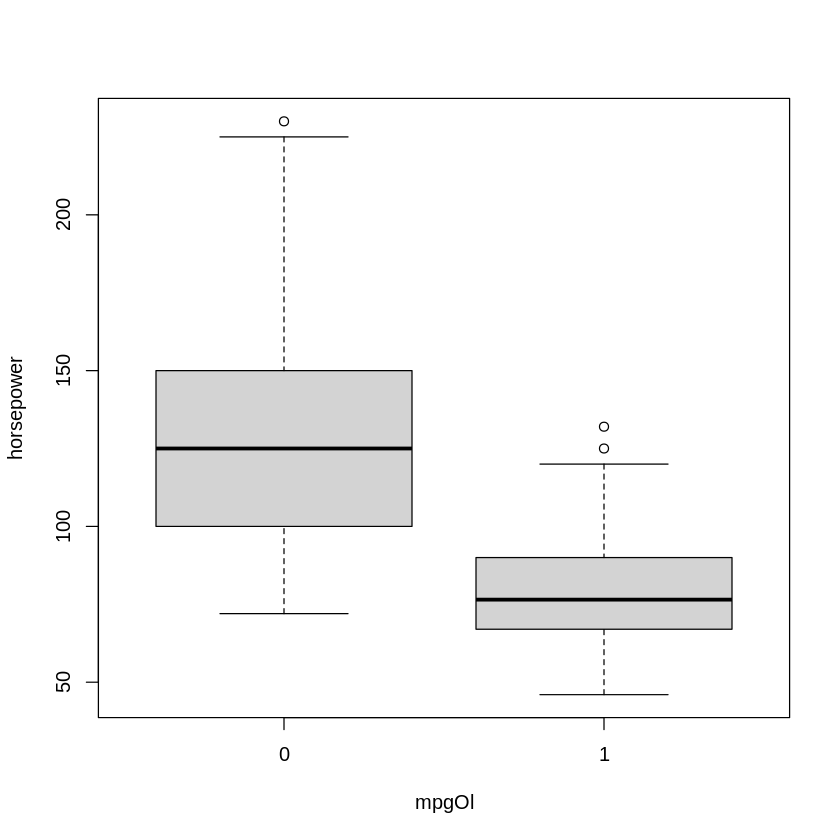

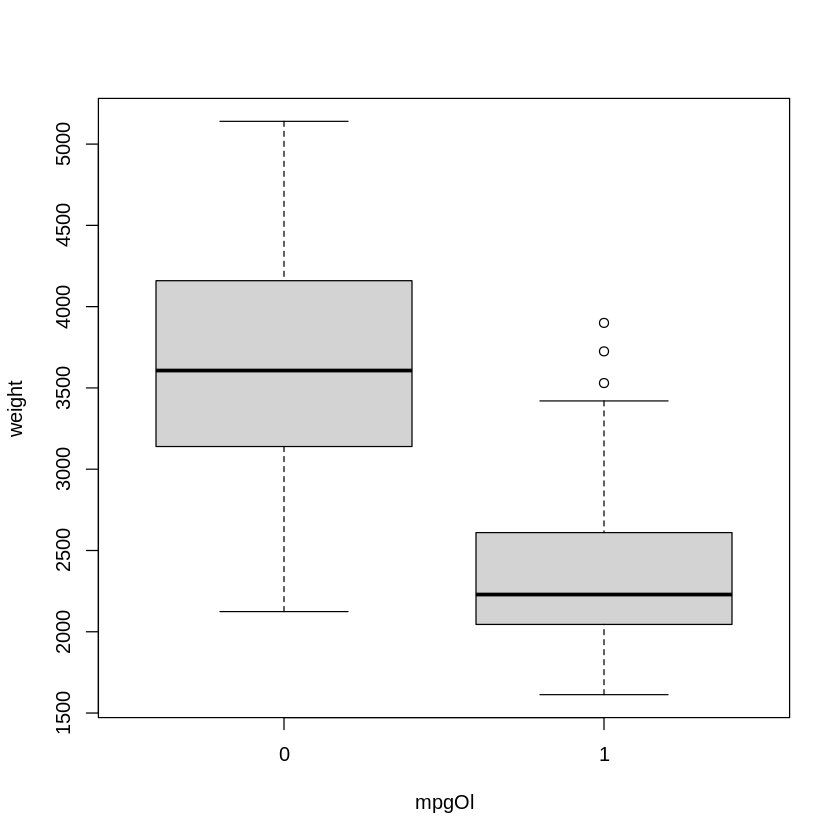

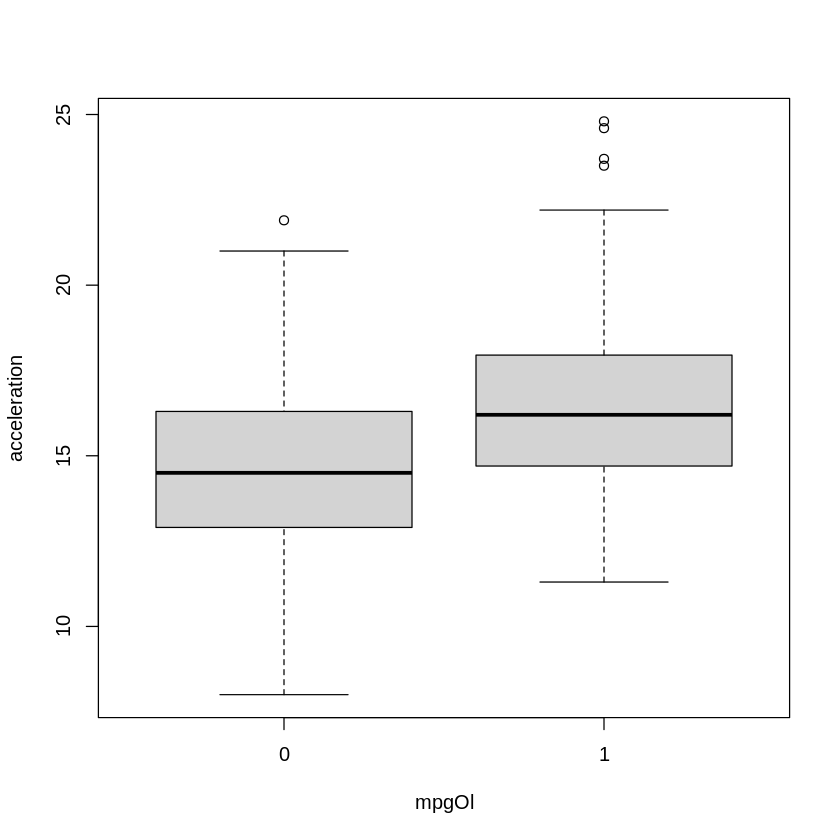

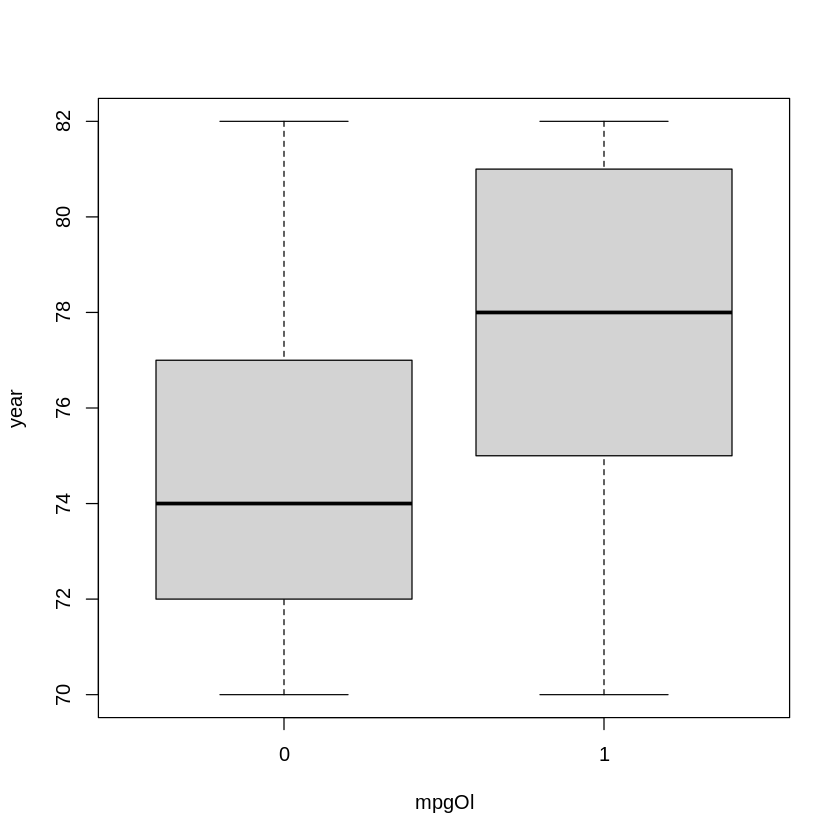

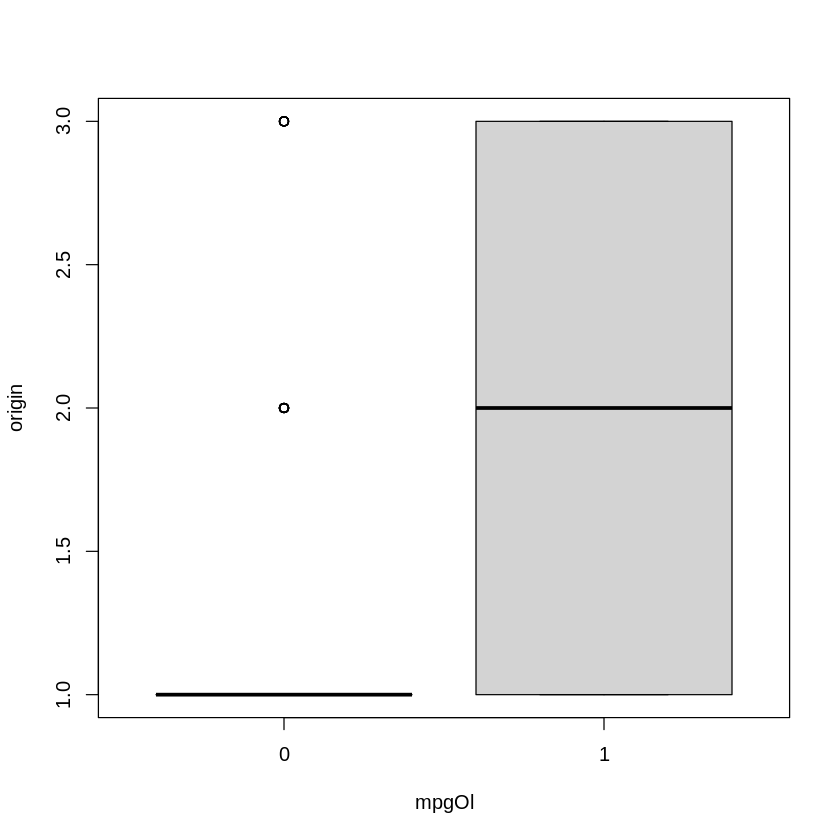

In [ ]:
for (col in colnames(Auto)) {
  if (col == "mpg" || col == "mpgOl" || col == "name") {
    next
  }
  boxplot(as.formula(paste(col, "~ mpgOl", sep="")), data=Auto)
}

Предикторы `acceleration` и `year` не подходят для классификации `mpgOl`.

Наиболее подходящие для предсказания `mpgOl` являются переменные `cylinders`, `displacement` и `weight`.

3. Разбейте данные на обучающую и контрольные выборки. Данные разбить случайным образом на выборки равного объёма.

In [ ]:
set.seed(42)
train_size <- floor(0.5 * nrow(Auto))
train_indices <- sample(seq_len(nrow(Auto)), size = train_size)
train <- Auto[train_indices, ]
test <- Auto[-train_indices, ]

4. Постройте LDA-модель по обучающим данным для предсказания `mpgOl` на основе переменных, которые выглядели наиболее тесно связанными с `mpgOl` в п. 2. Чему равна частота ошибок на контрольной выборке?

In [ ]:
lda_model <- lda(mpgOl ~ cylinders + displacement + weight, data=train)
preds <- predict(lda_model, test)$class
print(paste("LDA error rate:", 1 - mean(preds == test$mpgOl), sep=" "))

[1] "LDA error rate: 0.0867346938775511"


Частота ошибок на контрольной выборке равна `0.0867346938775511`.

5. Постройте QDA-модель по обучающим данным для предсказания `mpgOl` на основе переменных, которые выглядели наиболее тесно связанными с `mpgOl` в п. 2. Чему равна частота ошибок на контрольной выборке?

In [ ]:
qda_model <- lda(mpgOl ~ cylinders + displacement + weight, data=train)
preds <- predict(qda_model, test)$class
print(paste("QDA error rate:", 1 - mean(preds == test$mpgOl), sep=" "))

[1] "QDA error rate: 0.0867346938775511"


Частота ошибок на контрольной выборке равна `0.0867346938775511`.

6. Постройте логистическую регрессию по обучающим данным для предсказания `mpgOl` на основе переменных, которые выглядели наиболее тесно связанными с `mpgOl` в п. 2. Чему равна частота ошибок на контрольной выборке?

In [ ]:
logistic_model <- glm(mpgOl ~ cylinders + displacement + weight, data=train, family=binomial)
probas = predict(logistic_model, test, type="response")
preds = rep(0, length(probas))
preds[probas > 0.5] = 1
print(paste("Logistic regression error rate:", 1 - mean(preds == test$mpgOl), sep=" "))

[1] "Logistic regression error rate: 0.0867346938775511"


Частота ошибок на контрольной выборке равна `0.0867346938775511`.

## Задание №3

Используя набор данных `Boston`, постройте классификаторы для предсказания того, превышает ли уровень преступности в некотором пригороде медианное значение этой переменной. Попробуйте модели логистической регрессии, LDA и QDA с разными наборами предикторов. Опишите свои результаты.

In [ ]:
data("Boston")
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
Boston$crimOl = as.factor(mapply(function(x) as.integer(x>median(Boston$crim)), Boston$crim))
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crimOl
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0


In [ ]:
set.seed(42)
train_size <- floor(0.3 * nrow(Boston))
train_indices <- sample(seq_len(nrow(Boston)), size = train_size)
train <- Boston[train_indices, ]
test <- Boston[-train_indices, ]

In [ ]:
predictors <- c("zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat", "medv")
trues <- test$crimOl

get_glm_acc <- function(formula, train, test) {
  model <- glm(as.formula(formula), data=train, family=binomial)
  probas <- predict(model, test, type="response")
  preds <- rep(0, length(probas))
  preds[probas > 0.5] = 1
  return(mean(preds == trues))
}
get_da_acc <- function(formula, train, test, da) {
  model <- da(as.formula(formula), data=train)
  preds <- predict(model, test)$class
  return(mean(preds == trues))
}
best_model_acc <- 0
best_model_formula <- ""
best_model_type <- ""
for (num_predictors in 1:length(predictors)) {
  predictor_combinations <- combn(predictors, num_predictors)
  num_combinations <- dim(predictor_combinations)[2]
  for (combination_idx in 1:num_combinations) {
    formula <- paste(
      "crimOl ~ ",
      paste(predictor_combinations[, combination_idx], collapse="+"),
      sep=""
    )

    logistic_acc = get_glm_acc(formula, train, test)
    if (logistic_acc > best_model_acc) {
      best_model_acc = logistic_acc
      best_model_formula = formula
      best_model_type = "GLM"
    }

    lda_acc <- get_da_acc(formula, train, test, lda)
    if (lda_acc > best_model_acc) {
      best_model_acc <- lda_acc
      best_model_formula <- formula
      best_model_type <- "LDA"
    }

    qda_acc <- get_da_acc(formula, train, test, qda)
    if (qda_acc > best_model_acc) {
      best_model_acc <- qda_acc
      best_model_formula <- formula
      best_model_type <- "QDA"
    }
  }
}

print(paste("Best model: ", best_model_type))
print(paste("Formula: ", best_model_formula))
print(paste("Acc: ", best_model_acc))
print(paste("Error rate: ", 1 - best_model_acc))

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] "Best model:  QDA"
[1] "Formula:  crimOl ~ zn+indus+nox+rm+rad+tax+ptratio+black"
[1] "Acc:  0.96056338028169"
[1] "Error rate:  0.0394366197183098"


Наилучшие результаты достигаются моделью `QDA` с формулой `crimOl ~ zn + indus+ nox + rm + rad + tax + ptratio + black`. Точность `0.96056338028169`